In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('flipkart_reviews.csv')
data.head()

,Product_name,Review,Rating
0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5
2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5
4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5


**checking Null values**

In [4]:
data.isnull().sum()

,0
Product_name,0
Review,0
Rating,0


Data Cleaning

In [5]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer('english')
stopword = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
import re
import string

def clean(text):
  text = str(text).lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)
  text = [word for word in text.split(' ') if word not in stopword]
  text = ' '.join(text)
  text = [stemmer.stem(word) for word in text.split(' ')]
  text = " ".join(text)
  return text
data['Review'] = data['Review'].apply

**Sentimant Analysis of Flipkart Reviews**

In [8]:
ratings = data['Rating'].value_counts()
numbers = ratings.index
quantity = ratings.values

# Data Visualization

In [9]:
import plotly.express as px
figure = px.pie(data, values=quantity, names=numbers, hole = 0.5)
figure.show()

**So 60% of the reviewers have given 5 out of 5 ratings to the products they buy from Flipkart.**

I will use a word cloud to visualize the most used words in the reviews column:

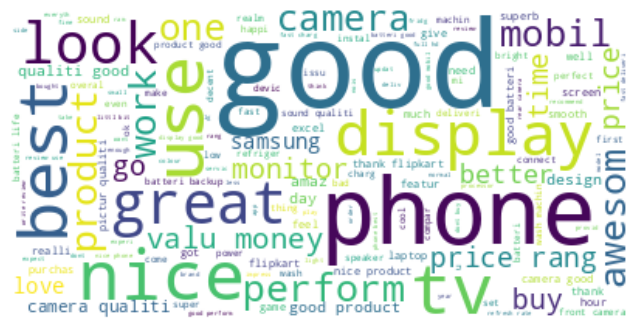

In [12]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in data.Review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Now I will analyze the sentiments of Flipkart reviews by adding three columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the reviews:

In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in data['Review']]
data['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in data['Review']]
data['Neutral'] = [sentiments.polarity_scores(i)['neu'] for i in data['Review']]
data = data[['Review', 'Positive', 'Negative', 'Neutral']]
data.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Review,Positive,Negative,Neutral
0,best great performancei got around backup bi...,0.395,0.101,0.504
1,good perfom,0.744,0.000,0.256
2,great perform usual also game laptop issu batt...,0.277,0.000,0.723
3,wife happi best product 👌🏻😘,0.512,0.000,0.488
4,light weight laptop new amaz featur batteri li...,0.000,0.000,1.000


Now let’s see how most of the reviewers think about the products and services of Flipkart:



In [16]:
x = sum(data['Positive'])
y = sum(data['Negative'])
z = sum(data['Neutral'])

def sentiment_score(a, b, c):
  if (a>b) and (a>c):
    print("Positive 😊")
  elif  (b>a) and (b>c):
    print('Negative')
  else:
    print('Neutral')
sentiment_score(x, y, z)

Neutral


So most of the reviews are neutral

Let’s have a look at the total of Positive, Negative, and Neutral sentiment scores to find a conclusion about Flipkart reviews:

In [17]:
print('Positive: ', x)
print('Negative: ', y)
print('Neutral: ', z)

Positive:  923.5529999999985
Negative:  96.77500000000013
Neutral:  1283.6880000000006


So, most people give Neutral reviews, and a small proportion of people give Negative reviews. So we can say that people are satisfied with Flipkart products and services.